# Fraud detection

- Importing libraries 
- Importing csv file


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
fraud_df = pd.read_csv("/Users/umarmoin/Documents/Fraud.csv")

# Exploratory Data Analysis

crisp DM methodology??
- step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

- type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

- amount - amount of the transaction in local currency.

- nameOrig - customer who started the transaction

- oldbalanceOrg - initial balance before the transaction

- newbalanceOrig - new balance after the transaction

- nameDest - customer who is the recipient of the transaction

- oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

- newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

- isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

- isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [5]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
fraud_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
fraud_df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [8]:
fraud_df.shape

(6362620, 11)

We have 6262620 rows and 11 columns

In [9]:
fraud_df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [10]:
fraud_df['isFraud'].value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

"isFraud" is only 0.12% but it is significant

## Checking for biasness in the data and normal data exploration
Target variable ratio

In [11]:
fraud_df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no missing values in any columns

## Different types of transaction 


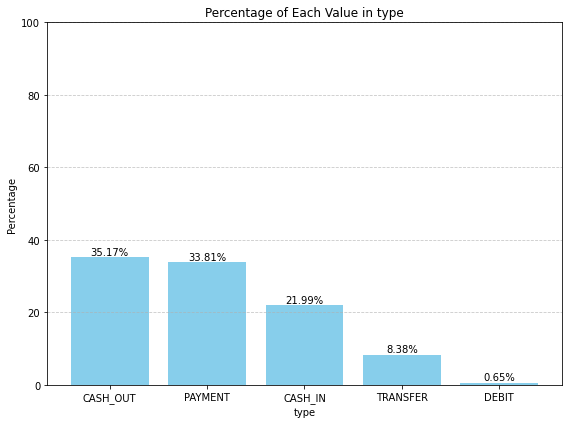

In [12]:
column_name = 'type'
# Get the counts of each unique value in 'column1'
value_counts = fraud_df[column_name].value_counts()
# Calculate percentages
percentages = (value_counts / len(fraud_df)) * 100
percentages = percentages.round(2)

# Plot a bar graph
plt.figure(figsize=(8, 6))
plt.bar(percentages.index, percentages.values, color='skyblue')
plt.xlabel(column_name)
plt.ylabel('Percentage')
plt.title(f'Percentage of Each Value in {column_name}')
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Adjust the y-axis limit to ensure the percentages are visible
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# Add value labels above each bar
for i, v in enumerate(percentages.values):
    plt.text(i, v, str(v) + '%', ha='center', va='bottom')
plt.show()

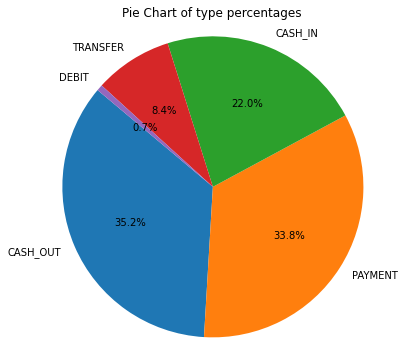

In [13]:
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {column_name} percentages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

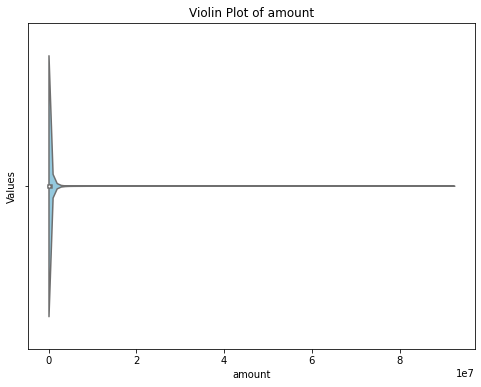

In [14]:
# Specify the column you want to plot
column_to_plot = 'amount'

# Create the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x=fraud_df[column_to_plot], color='skyblue')
plt.xlabel(column_to_plot)
plt.ylabel('Values')
plt.title(f'Violin Plot of {column_to_plot}')
plt.show()

<Figure size 432x288 with 0 Axes>

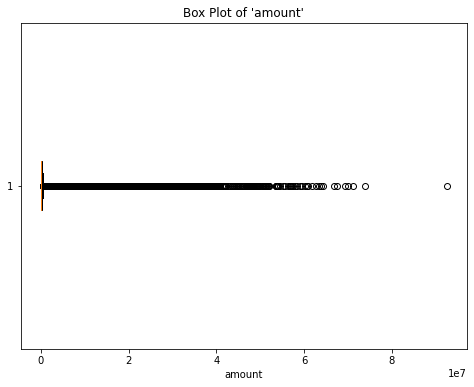

In [50]:
plt.figure(figsize=(6, 4))
plt.figure(figsize=(8, 6))
box = plt.boxplot(df['amount'], vert=False, patch_artist=True)

# Customizing the box colors
colors = ['lightblue']  # You can specify multiple colors for different boxes
for patch in box['boxes']:
    patch.set_facecolor(colors[0])
    
plt.title("Box Plot of 'amount'")
plt.xlabel("amount")
plt.show()

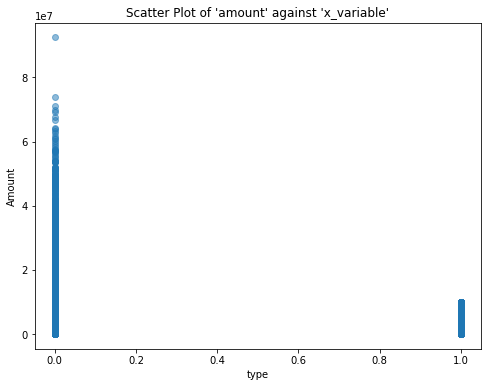

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(df['isFraud'], df['amount'], alpha=0.5)  # alpha adjusts the transparency of points
plt.title("Scatter Plot of 'amount' against 'x_variable'")
plt.xlabel("type")
plt.ylabel("Amount")
plt.show()

In [58]:
max_amount = df['amount'].max()
second_max_amount = df['amount'].nlargest(2).iloc[-1]

print("Maximum Amount:", max_amount)
print("Second Maximum Amount:", second_max_amount)

Maximum Amount: 92445516.64
Second Maximum Amount: 73823490.36


## Customer vs Merchant in nameOrig and nameDest

In [15]:
df= fraud_df.copy()
# Count the number of rows that start with 'C' in the 'nameOrig' column
count_nameOrig_startswith_C = df['nameOrig'].str.startswith('C').sum()

# Count the number of rows that start with 'M' in the 'nameOrig' column
count_nameOrig_startswith_M = df['nameOrig'].str.startswith('M').sum()

# Count the number of rows that start with 'C' in the 'nameDest' column
count_nameDest_startswith_C = df['nameDest'].str.startswith('C').sum()

# Count the number of rows that start with 'M' in the 'nameDest' column
count_nameDest_startswith_M = df['nameDest'].str.startswith('M').sum()

print("Number of rows that start with 'C' in nameOrig column:", count_nameOrig_startswith_C)
print("Number of rows that start with 'M' in nameOrig column:", count_nameOrig_startswith_M)
print("Number of rows that start with 'C' in nameDest column:", count_nameDest_startswith_C)
print("Number of rows that start with 'M' in nameDest column:", count_nameDest_startswith_M)

Number of rows that start with 'C' in nameOrig column: 6362620
Number of rows that start with 'M' in nameOrig column: 0
Number of rows that start with 'C' in nameDest column: 4211125
Number of rows that start with 'M' in nameDest column: 2151495


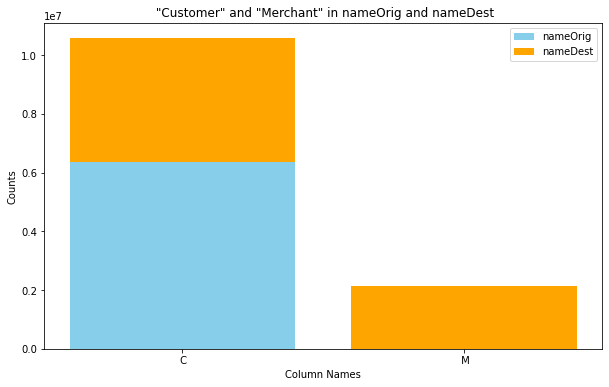

In [16]:
# Create the bar plot
labels = [' C', ' M']
counts_nameOrig = [count_nameOrig_startswith_C, count_nameOrig_startswith_M]
counts_nameDest = [count_nameDest_startswith_C, count_nameDest_startswith_M]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts_nameOrig, color='skyblue', label='nameOrig')
plt.bar(labels, counts_nameDest, color='orange', label='nameDest', bottom=counts_nameOrig)
plt.xlabel('Column Names')
plt.ylabel('Counts')
plt.title(' "Customer" and "Merchant" in nameOrig and nameDest')
plt.legend()
plt.show()

Copying data into new dataframe beacuse of having seprate dataframe from original 

In [17]:
fraud_dfnew = fraud_df.copy()

### Checking and dropping for zero "amount" transfers and "oldbalanceOrg"
- dropping where amount and oldbalanceOrg is zero becuase no transactions been made inbetween

In [18]:
# dropping column amount where value is 0
df_rem = fraud_dfnew.drop(fraud_dfnew[fraud_dfnew['amount'] == 0.0].index) 
# dropping column oldbalanceOrg where value is 0
df_rem = df_rem.drop(df_rem[df_rem['oldbalanceOrg'] == 0.0].index)
df_rem

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


- Filtering 'namedest' starting with 'C' while dropping 'namedest' starting with 'M' because every entry with 'M' is entered as "0" in 'oldbalanceDest' and 'newbalanceDest'

In [19]:
test = df_rem[df_rem['nameDest'].str.startswith('C')]
#test.head(60)
test

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0
10,1,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.00,157982.12,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Calculating the % of number of '0' in column 'newbalanceDest' in 'test'

In [20]:
count_zero_amount_dest = (test['newbalanceDest'] == 0.0).sum()
round(count_zero_amount_dest/len(test)*100,2)

9.84

Calculating the % of number of '1' in column 'isFraud' in 'test'

In [21]:
count_zero_amount_dest = (test['isFraud'] == 1).sum()
round(count_zero_amount_dest/len(test)*100,2)


0.28

- 0.28% of data is Fraud

### Dropping 'nameDest' and 'nameOrig' as not relevant for further analysis

In [22]:
test1 = test.drop(['nameDest','nameOrig'], axis=1)

In [23]:
test1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.00,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.00,1,0
9,1,DEBIT,5337.77,41720.0,36382.23,41898.0,40348.79,0,0
10,1,DEBIT,9644.94,4465.0,0.00,10845.0,157982.12,0,0
15,1,CASH_OUT,229133.94,15325.0,0.00,5083.0,51513.44,0,0


### one hot encoding 'type' why??

In [24]:
one_hot_encoded_data = pd.get_dummies(test1, columns = ['type'])
one_hot_encoded_data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_TRANSFER
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,0,1,0,0
9,1,5337.77,41720.00,36382.23,41898.00,40348.79,0,0,0,0,1,0
10,1,9644.94,4465.00,0.00,10845.00,157982.12,0,0,0,0,1,0
15,1,229133.94,15325.00,0.00,5083.00,51513.44,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,0,1,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,0,1,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,0,1


## Corelation Matrix 
## The correlation matrix is used to summarize the data and identify patterns and then make a decision according to it.


*   If the relationship is 1, then the relationship is strong.
*   If the relationship is 0, then it means the relationship is neutral.
*   If the relationship is -1, then it means the relationship is negative or not strong.

Strong positive relation between newbalancedest and oldbalancedest.
Strong positive relation between Newbalanceorg and oldbalanceorg.
Cash in and cash out have a strong negative relationship.

These insigts help us in feature selection decsion making acc. to the type of ML model we apply.

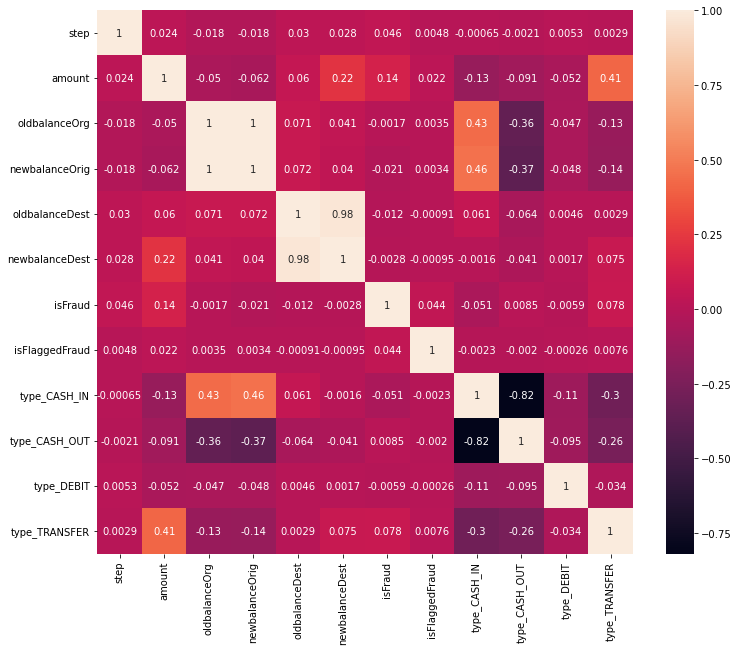

In [25]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(one_hot_encoded_data.corr(), annot=True)

### Dropping 'newbalanceOrig' and 'oldbalanceDest' becuase 'newbalanceOrig' and 'oldbalanceOrg' are correlated significantly positive same goes for 'oldbalanceDest' and 'newbalanceDest'

In [26]:
encoded_data = one_hot_encoded_data.drop(['newbalanceOrig','oldbalanceDest'], axis=1)

In [27]:
# Separate data into cases where 'isFraud' is 0 and 1
df_fraud_0 = one_hot_encoded_data[one_hot_encoded_data['isFraud'] == 0]
df_fraud_1 = one_hot_encoded_data[one_hot_encoded_data['isFraud'] == 1]

In [28]:
test1['isFraud'].value_counts()

0    2874749
1       8172
Name: isFraud, dtype: int64

In [29]:
print(test1['isFraud'].value_counts(normalize=True))

0    0.997165
1    0.002835
Name: isFraud, dtype: float64


As we can observe in 'isFraud' fraud cases that is "1" are 8172. So if we have to split the data 90:10 then the data set which needs to be selected is 81720


In [30]:
# Calculate the number of rows to select based on percentages
n_rows_0 = int(0.9 * 81720)
n_rows_1 = 81720 - n_rows_0

# Sample 90% of rows with 'isFraud' equal to 0 and 10% of rows with 'isFraud' equal to 1
sampled_df_fraud_0 = df_fraud_0.sample(n=n_rows_0)
sampled_df_fraud_1 = df_fraud_1.sample(n=n_rows_1)

# Concatenate the sampled DataFrames to create the final subset
subset_df = pd.concat([sampled_df_fraud_0, sampled_df_fraud_1])

print(subset_df)

         step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
1625941   157   160240.75       39952.00            0.00        85959.71   
2573224   207   281759.88       19526.00            0.00      1749268.57   
822065     40   535219.82         341.00       535560.82     12037361.51   
810133     40   114980.70        6380.00            0.00            0.00   
3919904   284     6519.07      272794.58       266275.51       451509.43   
...       ...         ...            ...             ...             ...   
6362366   723   128893.50      128893.50            0.00            0.00   
6019712   456    38180.99       38180.99            0.00            0.00   
1030546    71   386996.34      386996.34            0.00       512943.11   
5187789   362  1397689.48     1397689.48            0.00            0.00   
6032847   475  1064995.85     1064995.85            0.00            0.00   

         newbalanceDest  isFraud  isFlaggedFraud  type_CASH_IN  type_CASH_OUT  \
162594

In [31]:
# Prepare the features (X) and the target (y)
X = subset_df.drop(columns=['isFraud','newbalanceOrig','oldbalanceDest','isFlaggedFraud'])
y = subset_df['isFraud']

In [32]:
import statsmodels.api as sm
# Fit the logistic regression model
X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the logistic regression model
print(result.summary())

         Current function value: 0.140088
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:                81720
Model:                          Logit   Df Residuals:                    81711
Method:                           MLE   Df Model:                            8
Date:                Wed, 19 Jul 2023   Pseudo R-squ.:                  0.5691
Time:                        19:53:18   Log-Likelihood:                -11448.
converged:                      False   LL-Null:                       -26566.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -69.1541        nan        nan        nan         nan         nan
step               0.0043      0.000     42.789      

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Different ML models
- Loading different libraries

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#import tensorflow as tf
from sklearn.metrics import roc_curve, roc_auc_score, auc


## Performing standardisation
- Standardizing data in machine learning is crucial because it ensures that all features have the same scale, preventing any one feature from dominating the model. It facilitates faster optimization, improves numerical stability, and avoids biases in distance-based algorithms.

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## KNN model

In [39]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can change 'n_neighbors' to the desired value
knn_classifier.fit(X_train_scaled, y_train)

# making predictions
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculating sensitivity and specificity
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Sensitivity (True Positive Rate): 0.8119742701632855
Specificity (True Negative Rate): 0.9919061328697919
Accuracy: 0.9741067058247675
Confusion Matrix:
[[18260   149]
 [  380  1641]]


### True positives and true negatives are fundamental concepts in binary classification tasks. In a binary classification, the goal is to classify data into one of two classes: positive and negative.

True positives (TP): These are the cases where the model correctly predicts the positive class when the actual class is also positive. In other words, the model correctly identifies positive instances.

True negatives (TN): These are the cases where the model correctly predicts the negative class when the actual class is also negative. In other words, the model correctly identifies negative instances.

### Receiver Operating Characteristic (ROC)
- The Receiver Operating Characteristic (ROC) curve is a graphical representation of a binary classifier's performance across various discrimination thresholds. It plots the true positive rate (TPR) against the false positive rate (FPR) as the discrimination threshold is varied. The ROC curve is valuable in machine learning because it provides a comprehensive way to assess the model's performance across different classification thresholds, helping to find the optimal balance between sensitivity (recall) and specificity. It also allows for easy comparison between different models, highlighting which one performs better overall. The area under the ROC curve (AUC) further quantifies the model's discriminative power, with a higher AUC indicating better overall performance.

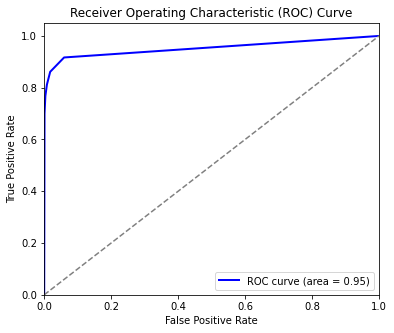

In [40]:
# Geting the predicted probabilities for the positive class
y_pred_probs = knn_classifier.predict_proba(X_test_scaled)[:, 1]

#Computing the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Ploting the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Logistics Regression

In [41]:
# Creating and training the logistic regression model
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train_scaled, y_train)

# making predictions
y_pred = logreg_classifier.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculating sensitivity and specificity
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Sensitivity (True Positive Rate): 0.5175655616031668
Specificity (True Negative Rate): 0.9945678744092563
Accuracy: 0.9473813020068527
Confusion Matrix:
[[18309   100]
 [  975  1046]]


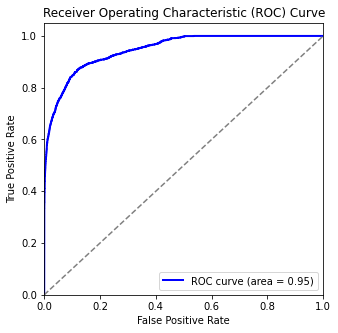

In [42]:
# Geting the predicted probabilities for the positive class
y_pred_probs = logreg_classifier.predict_proba(X_test_scaled)[:, 1]

#Computing the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Ploting the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Random forest

### Why Random Forest
- Random Forest can be considered better than Logistic Regression in certain scenarios due to its ability to handle complex relationships and non-linearities in the data. Unlike Logistic Regression, which assumes linear separability, Random Forest's ensemble approach allows it to capture intricate patterns and interactions among variables, making it more suitable for diverse and intricate datasets. Additionally, Random Forest is less prone to overfitting, ensuring robust generalization to unseen data. Moreover, it provides feature importance scores, allowing us to understand the impact of each variable on the prediction. However, it is essential to note that the choice between the two algorithms should be driven by the specific problem at hand, as Logistic Regression excels in cases with linearly separable data and provides interpretable insights. Therefore, carefully assessing the data and the goals of the analysis is crucial to make an informed decision about the preferred model.

In [43]:
# Creating and train the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# making predictions
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculating sensitivity and specificity
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Sensitivity (True Positive Rate): 0.9099455714992578
Specificity (True Negative Rate): 0.9970666521809984
Accuracy: 0.9884483602545276
Confusion Matrix:
[[18355    54]
 [  182  1839]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


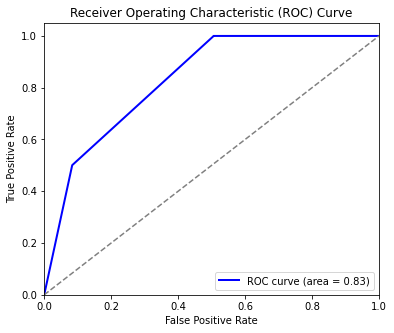

In [44]:
# Geting the predicted probabilities for the positive class
y_pred_probs = rf_classifier.predict_proba(X_test_scaled)[:, 1]

#Computing the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Ploting the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Your task is to execute the process for proactive detection of fraud while answering following
questions.
1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

##### Ques1. Data cleaning including missing values, outliers and multi-collinearity.
Ans: There were no missing values in any column, outliers were checked through box-plot and none were detected as the data is scatterd. 
High multi-collinearity can lead to unstable model coefficients and difficulty in interpreting feature importance.

##### Ques3. How did you select variables to be included in the model?

Ans: The variables for the model were selected through a careful process of observing the correlation between each other and considering specific criteria for dropping certain variables. One of the variables, named 'namedest,' was dropped due to a specific condition related to the destination names. Specifically, all destination names starting with the letter 'M' were removed from the dataset because there were no entries across the 'oldbalanceDest' and 'newbalanceDest' variables for these destinations.

The variables were selected based on observing the correlation between them and the target variable.By analyzing the correlation between the variables 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', and 'newbalanceDest'. We identify the ones that show a strong relationship with each other and dropped one of them. Such as 'newbalanceOrig','oldbalanceDest' and 'nameDest','nameOrig' were not relevant for further analysis.

##### Ques4. Demonstrate the performance of the model by using best set of tools.

Ans. Sensitivity (True Positive Rate): The Random Forest model achieved the highest sensitivity (0.9099), indicating that it correctly identifies a large proportion of actual positive cases (fraud, in this case). This is crucial for fraud detection, as it reduces the chances of missing fraudulent transactions.

Specificity (True Negative Rate): The Random Forest model also achieved the highest specificity (0.9971), indicating that it correctly identifies a significant portion of actual negative cases (non-fraudulent transactions). High specificity is essential for reducing false alarms and maintaining trust in the system.

Accuracy: The Random Forest model obtained the highest accuracy (0.9884), which demonstrates its overall ability to make correct predictions on both positive and negative cases. High accuracy implies that the model performs exceptionally well across the entire dataset.

Overall, the Random Forest model's superior performance in Sensitivity, Specificity, and Accuracy makes it the best choice for fraud detection in this scenario. It strikes a balance between accurately detecting fraud instances and minimizing false positives, thus providing a robust and reliable solution for proactive fraud detection. However, it's essential to consider the computational complexity and interpretability of the model when making the final decision, as Random Forest can be more resource-intensive and less interpretable compared to Logistic Regression and KNN.

##### Ques5. What are the key factors that predict fraudulent customer?
Ans. Key factors which predicted fraudelent customers are 'amount','type_CASH_IN','type_CASH_OUT','type_DEBIT','type_TRANSFER','isFraud'. 
